<a href="https://colab.research.google.com/github/firaz-thakur/global-terrorism/blob/main/Copy_of_Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Firaz** **Thakur**

##Data Science Enthusiast at Almabetter

#Task :
Exploratory Data Analysis - Global Terrorism


#Importing all the libraries that are required for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Downloading the Data

In [2]:
#Mounting Google drive
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data Science (Alma Better)/Python/EDA project on global terrorism/Global Terrorism Data.csv',encoding='latin1')
df =pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#Checking the data 
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
#Shape of the data
df.shape

(181691, 135)

In [8]:
#To know the total no. of columns
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [9]:
#There are 135 no. of columns so, we will sort the column first on the basis of missing data
missing_data =df.isna().sum()

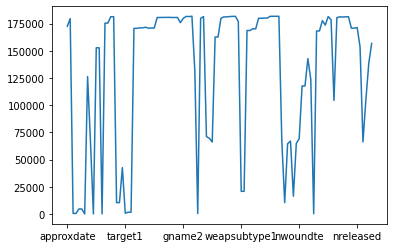

In [10]:
#plotting a graph just to represent it clearly
missing_data[missing_data!=0].plot(kind="line")

Since it is huge dataset, so we will neglecting some missing data columns and dealing with those columns which are helpful for analyzing data and also renaming certain columns for better understanding

for example :
iyear = Year,
imonth = Month, etc.

# Cleaning the dataset

In [11]:
#Renaming the columns :
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [12]:
#Selecting Columns that we need to study further :
df = df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attacktype','kill',
               'Wound','target1','Summary','Group','Targettype','Weapon','motive']]


In [13]:
#Checking the updated DataFrame :
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,kill,Wound,target1,Summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [14]:
#Checking the Missing Values : 
df.isna().sum().sort_values()

Year               0
Month              0
Day                0
Country            0
Region             0
Weapon             0
Attacktype         0
Targettype         0
Group              0
State            421
City             434
target1          636
Latitude        4556
Longitude       4557
kill           10313
Wound          16311
Summary        66129
motive        131130
dtype: int64

In [15]:
#Fill the NAN values of State to Unknown
df['State'] = df['State'].fillna('Unknown') 

In [16]:
#Fill the NAN values of City to Unknown
df['City'] = df['City'].fillna('Unknown')

In [17]:
#Fill the NAN values of taregt1 to Unknown
df['target1'] = df['target1'].fillna('Unknown')

In [18]:
#Fill the NAN values of Summary to Unknown
df['Summary'] = df['Summary'].fillna('Unknown')

In [19]:
#Fill the NAN values of motive to Unknown
df['motive'] = df['motive'].fillna('Unknown')

In [20]:
#Fill the NAN values of Latitude to 0
df['Latitude'] = df['Latitude'].fillna(0)

In [21]:
#Fill the NAN values of Longitude to 0
df['Longitude'] = df['Longitude'].fillna(0)

In [22]:
#Fill the NAN values of Kill to 0
df['kill'] = df['kill'].fillna(0)

In [23]:
#Fill the NAN values of Wound to 0
df['Wound'] = df['Wound'].fillna(0)

In [24]:
#New Dataframe :
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,kill,Wound,target1,Summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,Unknown,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,Unknown,MANO-D,Private Citizens & Property,Unknown,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",Unknown,23rd of September Communist League,Government (Diplomatic),Unknown,Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Unknown,Journalists & Media,Unknown,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Unknown,Government (Diplomatic),Explosives,Unknown
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Unknown,Government (Diplomatic),Incendiary,Unknown


In [25]:
#New Info of dataframne(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181691 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181691 non-null  object 
 7   Latitude    181691 non-null  float64
 8   Longitude   181691 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        181691 non-null  float64
 11  Wound       181691 non-null  float64
 12  target1     181691 non-null  object 
 13  Summary     181691 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      181691 non-null  object 
dtypes: float64(4), int64(3), object(11)
memory u

In [26]:
# Checking any NAN value left :
df.isna().sum()

Year          0
Month         0
Day           0
Country       0
State         0
Region        0
City          0
Latitude      0
Longitude     0
Attacktype    0
kill          0
Wound         0
target1       0
Summary       0
Group         0
Targettype    0
Weapon        0
motive        0
dtype: int64

In [27]:
df.describe()

,Year,Month,Day,Latitude,Longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.699442,2.021946e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.538561,6.835734e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


Observations from the data:
   
* Maximum number of people got killed : 1570
* In which year maximum people got killed : 2017
* In which year crime rate is almost zero or nearest to zero : 1970
* Maximum number of people got wounded : 8191







# Data Visualization :



 1. Which year has the highest number of terrorist attacks?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


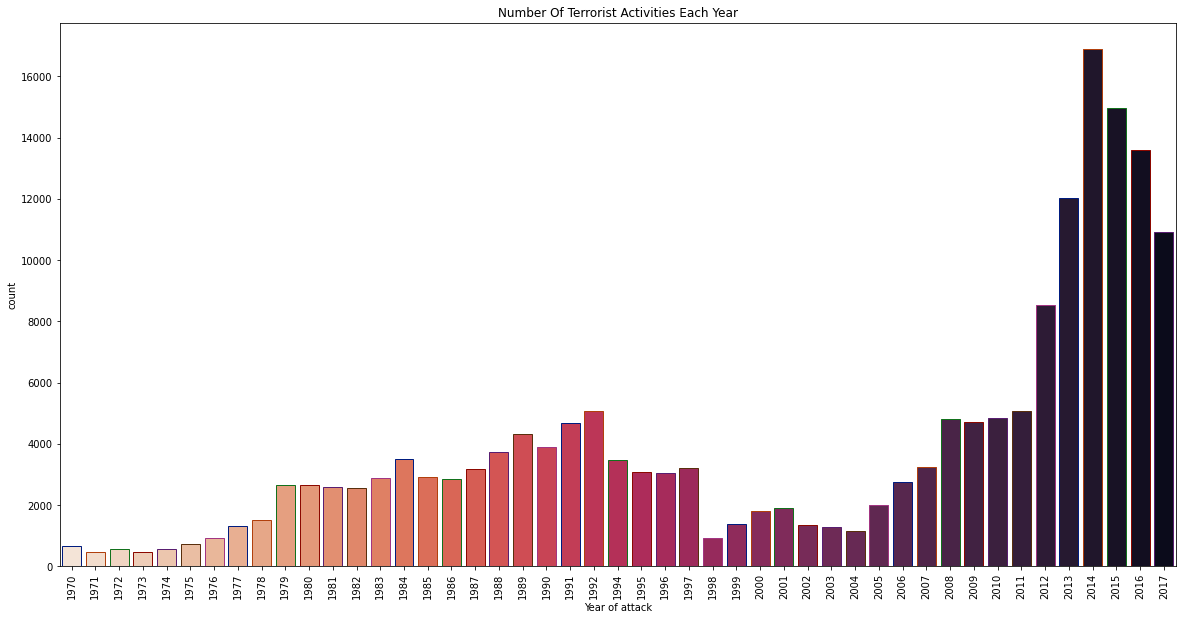

In [34]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=df,palette='rocket_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

It has been that 2014 has the highesh number of attacks followed by 2015 and then 2016.
it has also been observed that attacking trends are in inclining and declining path but after 2004 it has been inclining

2. Which Country has the highest number of attacks?

In [39]:
#Since we have data of 205 countries,we will find out some of the top 15 countries with high number of attacks
df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


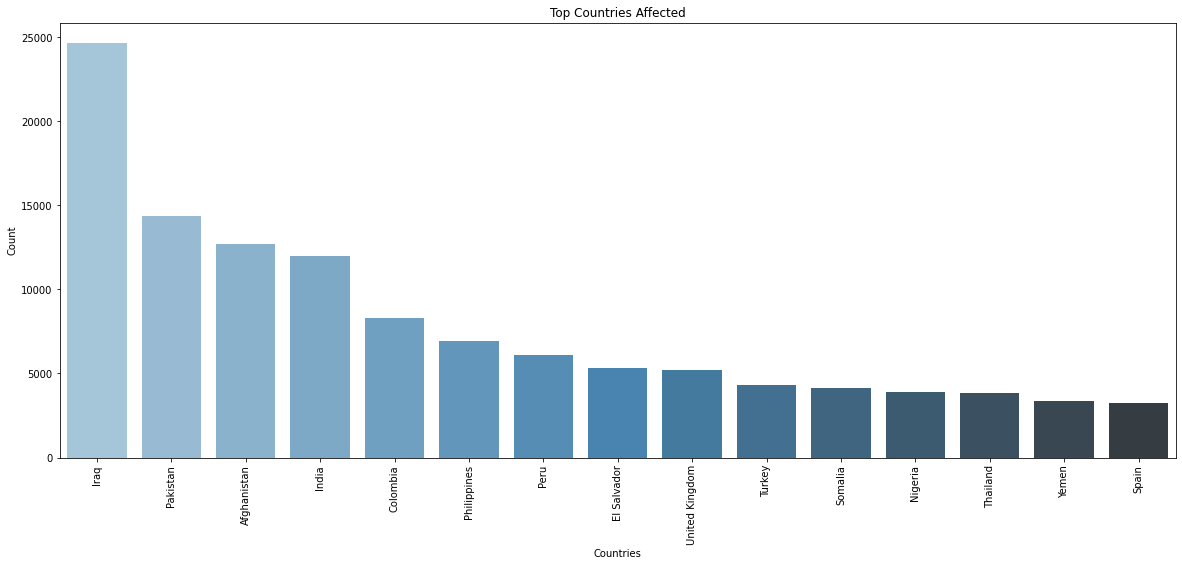

In [37]:
#Presenting top 15 countries with high number of attacks
plt.subplots(figsize=(20,8))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Iraq is the country which having the highest numbers of attacks with count value nearly around 25000 then pakistan count(15000) ,afghanistan count(14000), india and so on.
This count values shows us there has been huge difference between iraq and other countries in terms of safety or getting attacked

3. Types of Weapons used in the top 15 countries for attacking?